# Description:                                                                                                                   
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset url : https://www.cdc.gov/brfss/annual_data/annual_2014.html

# Step 1: Import libraries and Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load the dataset
data = pd.read_csv("modeldatset.csv")

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,1,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,1,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,1,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,1,2,3,0,0,0,11


# Step 2: Descriptive Statistics

In [3]:
print(data.isnull().sum())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64


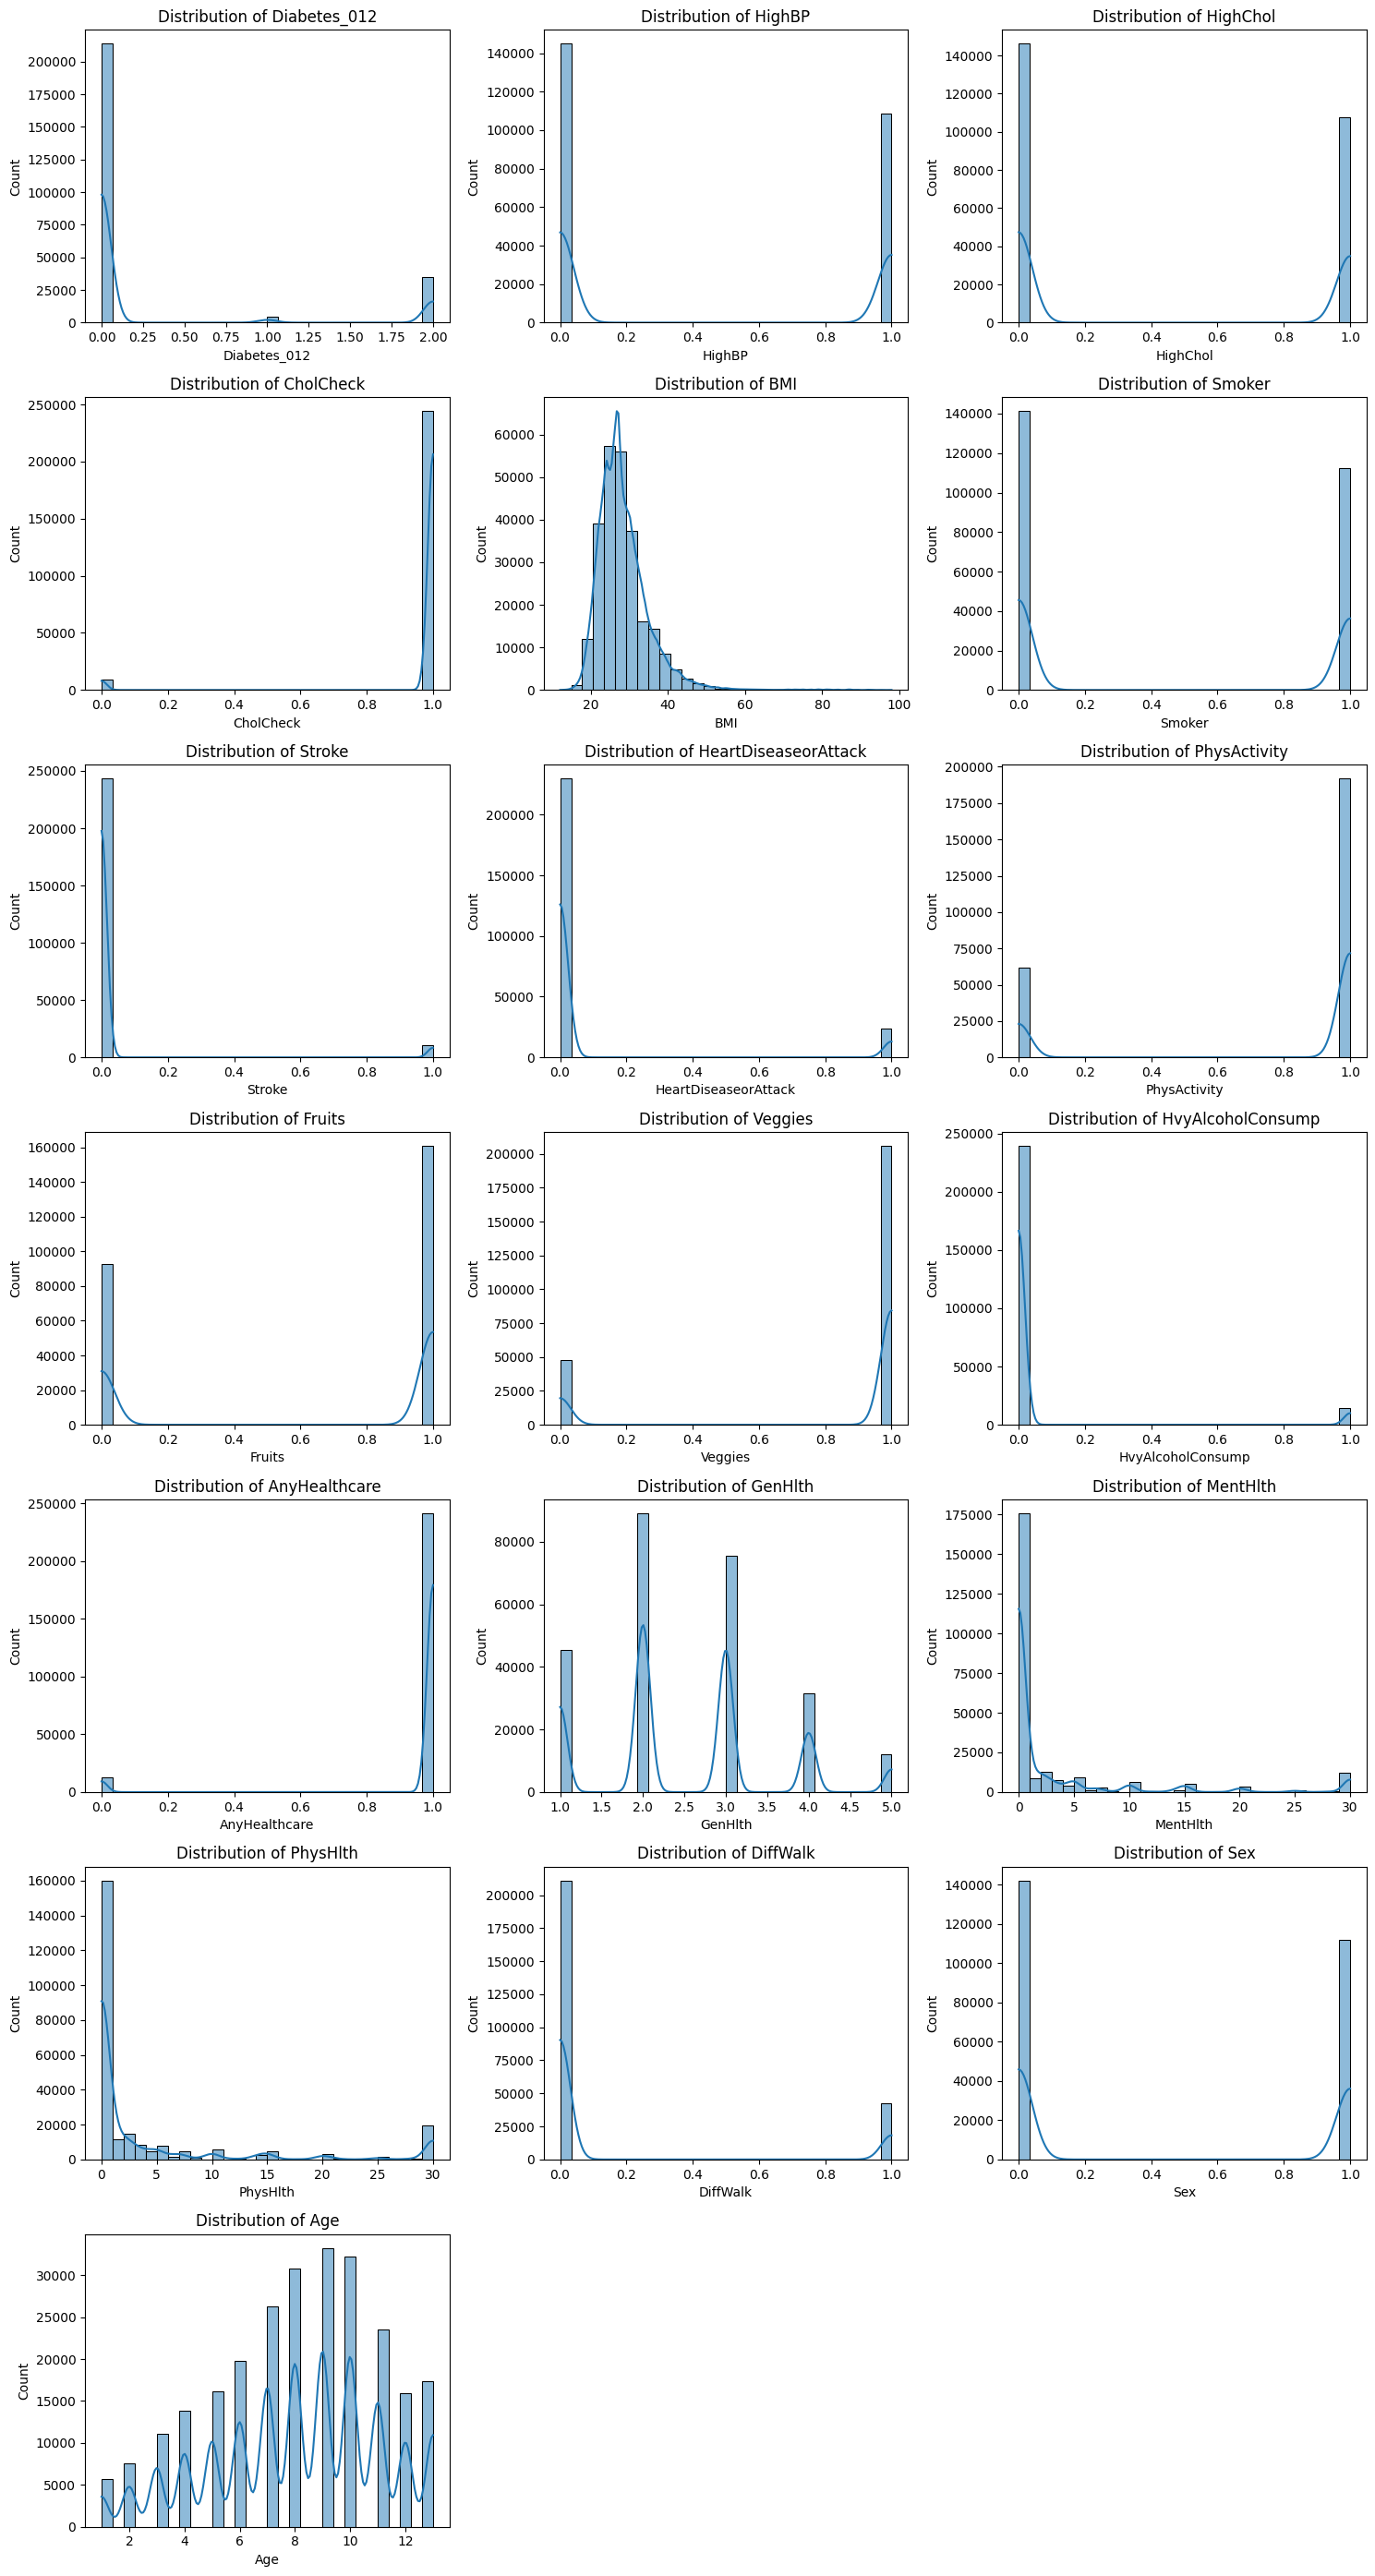


Missing values present in the data are: 
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

Summary statistics of the data are: 
         Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Display the number of missing values per column after replacement
missing_values = data.isnull().sum()

# Summary statistics to identify outliers or unusual values
summary_statistics = data.describe()

# Calculate the number of rows and columns for subplots
num_columns = len(data.columns)
num_rows = int(np.ceil(num_columns / 3))  # Adjust rows to fit all subplots

# Plot distributions of features and handle missing values
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {column}")


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("\nMissing values present in the data are: \n", missing_values)
print("\nSummary statistics of the data are: \n", summary_statistics)
#missing_values, summary_statistics

In [5]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


# DATA PREPROCESSING

# Step 3: Data Visualization

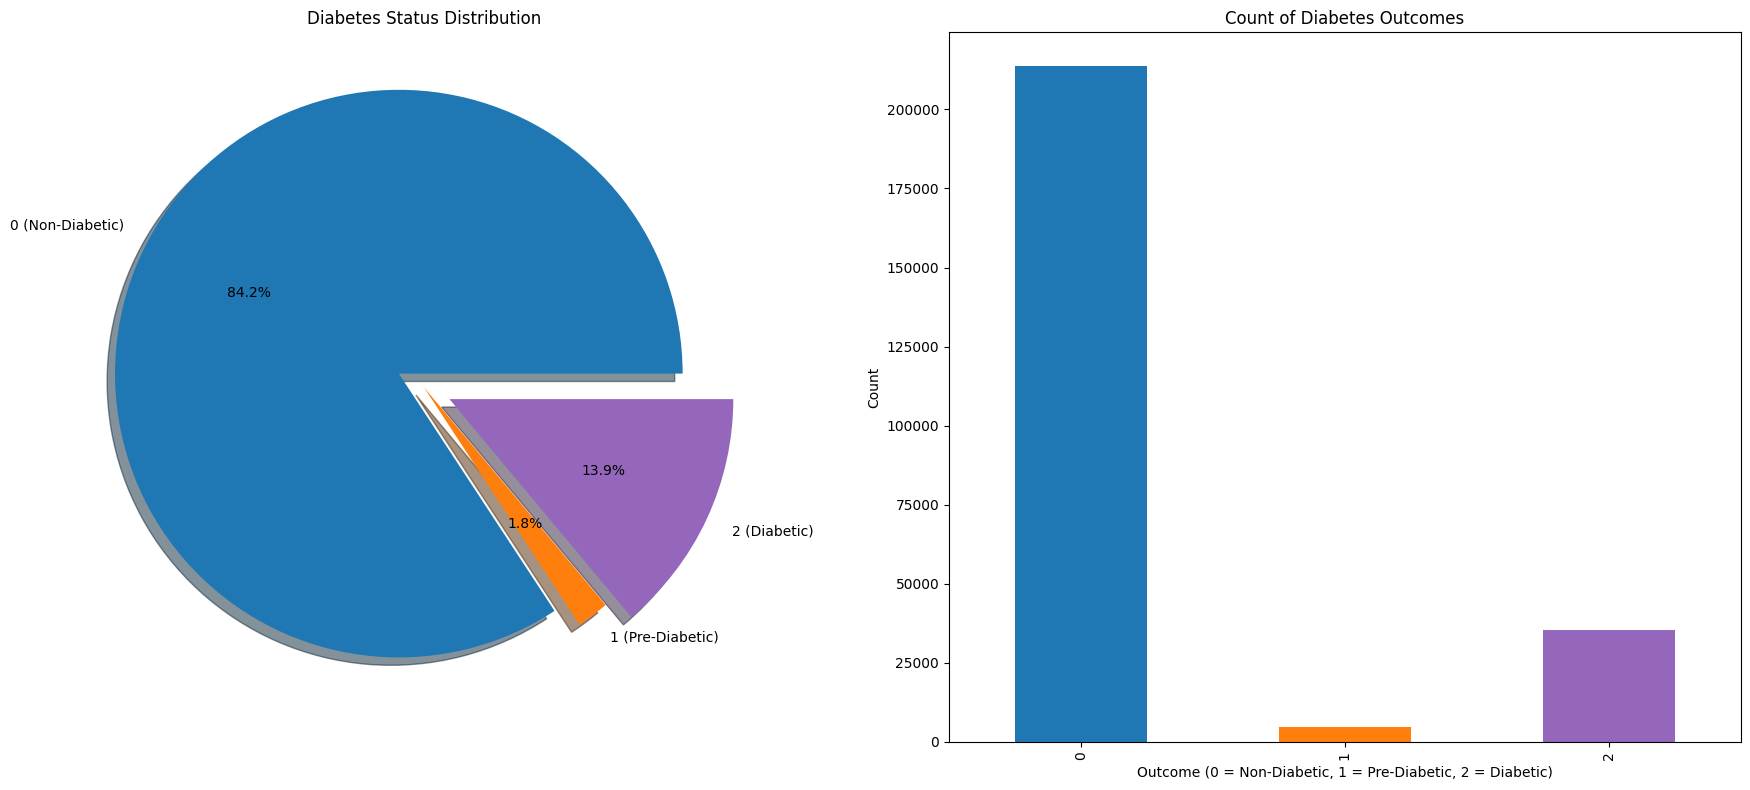

In [6]:
import matplotlib.pyplot as plt

# Ensure all categories are present
expected_categories = [0, 1, 2]
diabetes_counts = data['Diabetes_012'].value_counts().reindex(expected_categories, fill_value=0)

# Generate labels and colors
labels = [
    f"{value} ({'Diabetic' if value == 2 else 'Pre-Diabetic' if value == 1 else 'Non-Diabetic'})"
    for value in expected_categories
]
colors = ['#1f77b4', '#ff7f0e', '#9467bd']  # Colors for Non-Diabetic, Pre-Diabetic, Diabetic
explode = [0.1 if value in [0, 2] else 0 for value in expected_categories]  # Explode for Diabetic and Pre-Diabetic

# Plot pie chart and bar chart
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
diabetes_counts.plot.pie(
    explode=explode,
    autopct="%1.1f%%",
    ax=ax[0],
    shadow=True,
    labels=labels,
    colors=colors
)
ax[0].set_title('Diabetes Status Distribution')
ax[0].set_ylabel('')  # Remove the y-axis label

# Bar chart
diabetes_counts.plot.bar(
    ax=ax[1],
    color=colors
)
ax[1].set_title('Count of Diabetes Outcomes')
ax[1].set_xlabel('Outcome (0 = Non-Diabetic, 1 = Pre-Diabetic, 2 = Diabetic)')
ax[1].set_ylabel('Count')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




In [7]:
data.shape
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,1,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,1,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,1,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,1,2,3,0,0,0,11


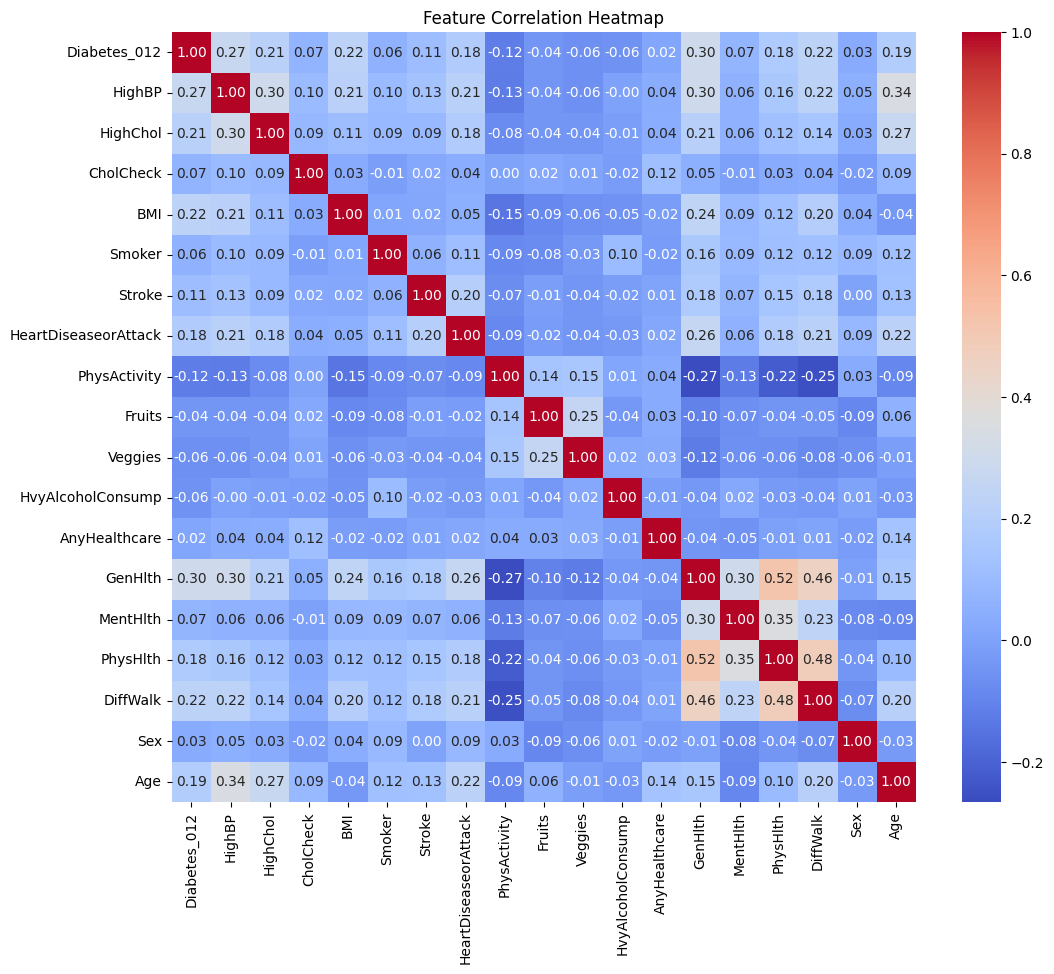

Correlations with the target variable:
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Name: Diabetes_012, dtype: float64


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns with zero values that might need imputation
columns_with_zero_values = [
    'BMI', 'MentHlth', 'PhysHlth', 'GenHlth'
]

# Impute missing values using the median (replace zeros if needed)

#imputer = SimpleImputer(strategy='median')
#data[columns_with_zero_values] = imputer.fit_transform(data[columns_with_zero_values])

# Define columns to scale
scaled_columns = [
    'HighBP', 'HighChol', 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth',
    'Age', 'PhysActivity', 'Fruits', 'Veggies', 'DiffWalk'
]

# Scale numerical features
scaler = StandardScaler()
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Compute correlations with the target variable
target_column = 'Diabetes_012'  # Target column name
correlations = data.corr()[target_column].sort_values(ascending=False)

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Display correlations with the target
print("Correlations with the target variable:")
print(correlations)


In [10]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1.153688,1.165254,1,1.757936,1,0,0,-1.762814,-1.316872,0.482087,0,1,2.329121,1.998592,1.233999,2.223615,0,0.316900
1,0,-0.866785,-0.858182,0,-0.511806,1,0,0,0.567275,-1.316872,-2.074316,0,0,0.457294,-0.429630,-0.486592,-0.449718,0,-0.337933
2,0,1.153688,1.165254,1,-0.057858,0,0,0,-1.762814,0.759375,-2.074316,0,1,2.329121,3.617407,2.954590,2.223615,0,0.316900
3,0,1.153688,-0.858182,1,-0.209174,0,0,0,0.567275,0.759375,0.482087,0,1,-0.478619,-0.429630,-0.486592,-0.449718,0,0.971733
4,0,1.153688,1.165254,1,-0.663122,0,0,0,0.567275,0.759375,0.482087,0,1,-0.478619,-0.024926,-0.486592,-0.449718,0,0.971733


In [11]:
data.shape

(253680, 19)

# Step 4: Feature Extraction

Selected Features for the Model:
['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 'CholCheck', 'Smoker']


<ipython-input-12-3b6822e148a0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


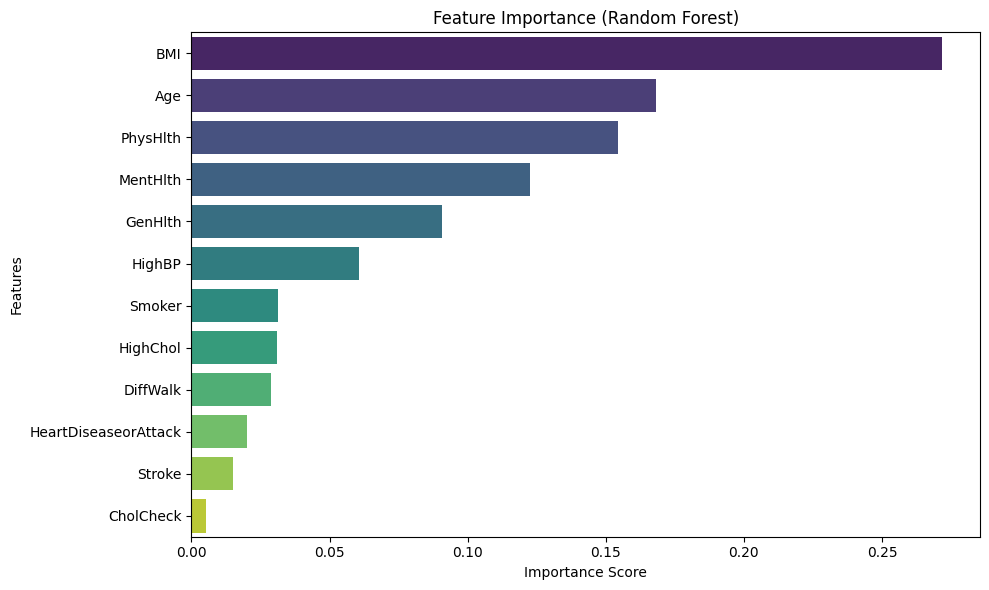

In [12]:
# Define selected features based on positive correlation threshold
selected_features = [
    'GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol',
    'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke',
    'MentHlth', 'CholCheck', 'Smoker'
]

# Subset the dataset with selected features
X_selected = data[selected_features]
y = data['Diabetes_012']

# Display the selected features
print("Selected Features for the Model:")
print(X_selected.columns.tolist())

# Visualize feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on selected features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_selected, y)

# Extract feature importances
importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Step 5: DEFINING AND TRAINING THE MODEL


In [13]:
# Define features and target
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8294899085462

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     42795
           1       0.03      0.01      0.01       944
           2       0.41      0.23      0.29      6997

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736


Confusion Matrix:
 [[40499   110  2186]
 [  805     5   134]
 [ 5366    50  1581]]


In [32]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)  # Set max_iter to ensure convergence
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8469528539892778

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.52      0.17      0.26      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736


Logistic Regression Confusion Matrix:
 [[41776     0  1019]
 [  868     0    76]
 [ 5802     0  1195]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:


# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8494757174392936

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.55      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736


Confusion Matrix:
 [[41847     0   948]
 [  861     0    83]
 [ 5744     1  1252]]


# Step 6: GRAPHS

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

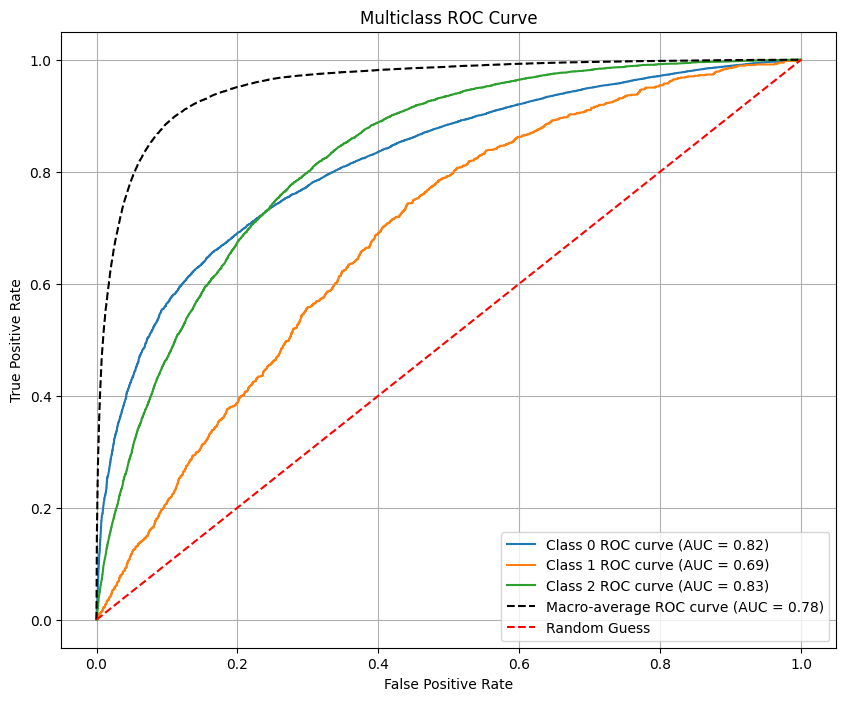

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels for multiclass (required for ROC curve)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Converts labels to a binary format
n_classes = y_test_bin.shape[1]

# Predict probabilities for all classes
y_pred_prob = xgb_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Compute macro-average ROC curve and AUC
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["macro"] = roc_auc_score(y_test_bin, y_pred_prob, average="macro", multi_class="ovr")

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} ROC curve (AUC = {roc_auc[i]:.2f})")

# Plot macro-average ROC
plt.plot(fpr["macro"], tpr["macro"], label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", linestyle='--', color="black")

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Add plot details
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()


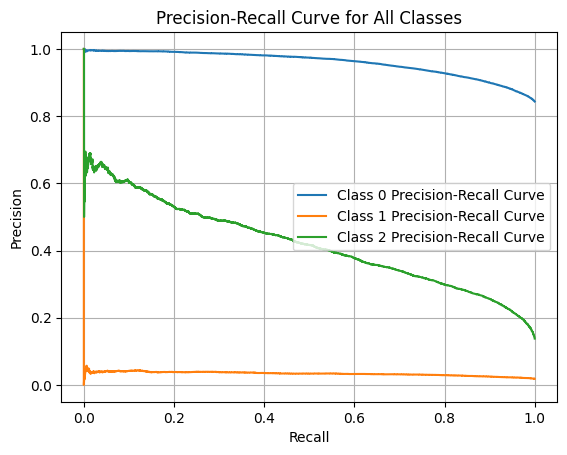

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Compute precision-recall curves for all classes
n_classes = y_pred_prob.shape[1]  # Number of classes
for i in range(n_classes):
    y_test_binary = label_binarize(y_test, classes=[0, 1, 2])[:, i]
    y_pred_prob_class = y_pred_prob[:, i]

    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob_class)

    # Plot
    plt.plot(recall, precision, label=f"Class {i} Precision-Recall Curve")

plt.title("Precision-Recall Curve for All Classes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


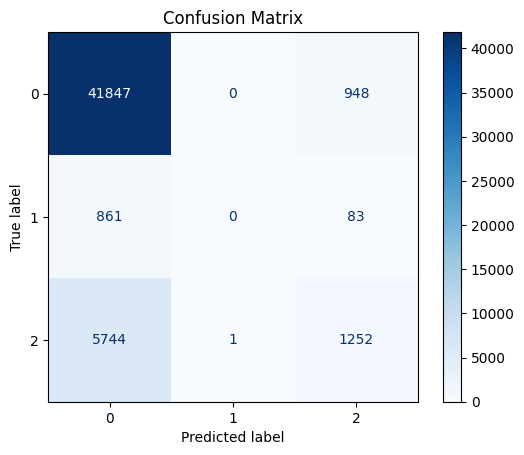

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])  # Replace labels with class names if needed
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title("Confusion Matrix")
plt.show()



---



# Step 7: Download the model

In [37]:
import pickle

# Assuming 'model' is your trained XGBoost model
# Save the model to a .pkl file
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(diabetes_model, file)

print("Model has been saved as 'diabetes_model.pkl'")


Model has been saved as 'diabetes_model.pkl'


In [39]:

# Step 1: Import Libraries
import numpy as np
import pickle
from IPython.display import display
from ipywidgets import interact_manual, widgets

# Step 2: Load the Trained Model
# Replace 'xgboost_model.pkl' with the filename of your saved XGBoost model
with open('diabetes_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Step 3: Define the Prediction Function
def predict_diabetes(features):
    """
    Predict diabetes status based on user input features.

    Parameters:
    features (list): List of feature values in the following order:
        ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol',
         'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke',
         'MentHlth', 'CholCheck', 'Smoker']

    Returns:
    str: Predicted diabetes status (Diabetic, Prediabetic, Not Diabetic).
    """
    # Ensure features are a numpy array
    input_data = np.array([features])

    # Get model prediction
    prediction = model.predict(input_data)

    # Map prediction to status
    if prediction == 0:
        return "Not Diabetic"
    elif prediction == 1:
        return "Prediabetic"
    elif prediction == 2:
        return "Diabetic"

# Step 4: Interactive User Input Interface
@interact_manual
def diabetes_prediction_interface(
    GenHlth=widgets.IntSlider(min=1, max=5, step=1, value=3, description="GenHlth (1-5)"),
    HighBP=widgets.ToggleButton(value=False, description="HighBP (True/False)"),
    BMI=widgets.FloatSlider(min=10, max=50, step=0.1, value=25, description="BMI"),
    DiffWalk=widgets.ToggleButton(value=False, description="DiffWalk (True/False)"),
    HighChol=widgets.ToggleButton(value=False, description="HighChol (True/False)"),
    Age=widgets.IntSlider(min=18, max=100, step=1, value=30, description="Age"),
    HeartDiseaseorAttack=widgets.ToggleButton(value=False, description="HeartDisease"),
    PhysHlth=widgets.IntSlider(min=0, max=30, step=1, value=0, description="PhysHlth (Days)"),
    Stroke=widgets.ToggleButton(value=False, description="Stroke (True/False)"),
    MentHlth=widgets.IntSlider(min=0, max=30, step=1, value=0, description="MentHlth (Days)"),
    CholCheck=widgets.ToggleButton(value=False, description="CholCheck"),
    Smoker=widgets.ToggleButton(value=False, description="Smoker")
):
    """
    User interface for entering health parameters and predicting diabetes status.
    """
    # Prepare input feature list
    features = [
        GenHlth, int(HighBP), BMI, int(DiffWalk), int(HighChol), Age,
        int(HeartDiseaseorAttack), PhysHlth, int(Stroke), MentHlth,
        int(CholCheck), int(Smoker)
    ]

    # Make prediction
    result = predict_diabetes(features)

    # Display the prediction
    print("\n=== Diabetes Prediction ===")
    print(f"Diabetes Status: {result}")


interactive(children=(IntSlider(value=3, description='GenHlth (1-5)', max=5, min=1), ToggleButton(value=False,…